<a href="https://colab.research.google.com/github/olimpiojunior/Dados-Goggle-Colaboratory/blob/master/Olimpio_Aula03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
imdb = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/24e271e68afe8fd257911217b88b2e07/raw/e70287fb1dcaad4215c3f3c9deda644058a616bc/movie_metadata.csv')
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [0]:
imdb["color"].unique()

array(['Color', nan, ' Black and White'], dtype=object)

In [0]:
imdb['color'].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

In [0]:
imdb['color'].value_counts(normalize = True)

Color               0.9584
 Black and White    0.0416
Name: color, dtype: float64

In [0]:
imdb['director_name'].value_counts().sort_values(ascending = False)

Steven Spielberg            26
Woody Allen                 22
Clint Eastwood              20
Martin Scorsese             20
Ridley Scott                17
                            ..
Steve Hickner                1
Ulu Grosbard                 1
Dominique Othenin-Girard     1
Ossie Davis                  1
Trent Cooper                 1
Name: director_name, Length: 2398, dtype: int64

In [0]:
imdb['num_critic_for_reviews']

0       723.0
1       302.0
2       602.0
3       813.0
4         NaN
        ...  
5038      1.0
5039     43.0
5040     13.0
5041     14.0
5042     43.0
Name: num_critic_for_reviews, Length: 5043, dtype: float64

In [0]:
imdb['num_critic_for_reviews'].describe().round(decimals = 0)

count    4993.0
mean      140.0
std       122.0
min         1.0
25%        50.0
50%       110.0
75%       195.0
max       813.0
Name: num_critic_for_reviews, dtype: float64

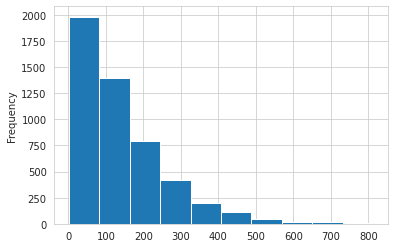

In [0]:
sns.set_style("whitegrid")
imdb['num_critic_for_reviews'].plot(kind = 'hist')

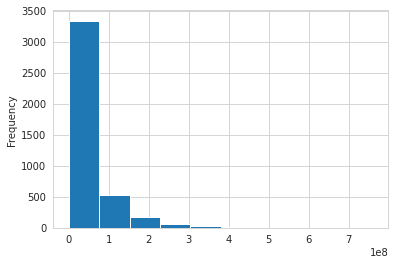

In [0]:
imdb['gross'].plot(kind = 'hist')

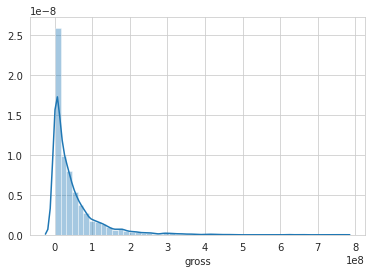

In [0]:
sns.distplot(imdb['gross'])

In [0]:
imdb.sort_values('gross', ascending=False).sample(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2886,Color,Douglas McGrath,129.0,118.0,41.0,442.0,Isabella Rossellini,2000.0,1150403.0,Biography|Crime|Drama,Toby Jones,Infamous,14143,3474,Hope Davis,4.0,blood|book|cold calculation|murder|writer,http://www.imdb.com/title/tt0420609/?ref_=fn_t...,102.0,English,USA,R,13000000.0,2006.0,812.0,7.1,1.85,0
3119,Color,Peter Sollett,166.0,90.0,6.0,617.0,Alexis Dziena,904.0,31487293.0,Comedy|Drama|Music|Romance,Ari Graynor,Nick and Norah's Infinite Playlist,74887,2807,Aaron Yoo,2.0,band|gay|gay friend|love|night,http://www.imdb.com/title/tt0981227/?ref_=fn_t...,129.0,English,USA,PG-13,9000000.0,2008.0,715.0,6.7,1.85,0
2038,Color,Brian Robbins,51.0,107.0,48.0,940.0,Ellen Albertini Dow,1000.0,12372410.0,Comedy|Sport,Oliver Platt,Ready to Rumble,11709,4971,Martin Landau,1.0,gay subtext|homoerotic fight|homoeroticism|hom...,http://www.imdb.com/title/tt0217756/?ref_=fn_t...,101.0,English,USA,PG-13,24000000.0,2000.0,957.0,5.3,1.85,650
3625,Color,Sheldon Lettich,17.0,99.0,23.0,82.0,Ryan Bollman,97.0,3273588.0,Action|Drama,Antoni Corone,Only the Strong,4195,382,Todd Susman,1.0,capoeira|fight|fighting|martial arts|violence,http://www.imdb.com/title/tt0107750/?ref_=fn_t...,50.0,English,USA,PG-13,6000000.0,1993.0,91.0,6.7,1.85,0
561,Color,John Moore,114.0,113.0,212.0,568.0,Tony Curran,2000.0,21009180.0,Action|Adventure|Drama|Thriller,Dennis Quaid,Flight of the Phoenix,45815,4397,Miranda Otto,4.0,captain|desert|rescue|stranded|survivor,http://www.imdb.com/title/tt0377062/?ref_=fn_t...,222.0,English,USA,PG-13,45000000.0,2004.0,845.0,6.1,2.35,1000


In [0]:
color_or_bw = imdb.query("color in ['Color', ' Black and White']")
len(color_or_bw)

5024

In [0]:
color_or_bw['color'] == "Color"

0       True
1       True
2       True
3       True
5       True
        ... 
5038    True
5039    True
5040    True
5041    True
5042    True
Name: color, Length: 5024, dtype: bool

In [0]:
color_or_bw['color_0_ou_1'] = (color_or_bw["color"] == "Color") * 1
color_or_bw.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_0_ou_1
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,1
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,1


In [0]:
color_or_bw['color_0_ou_1'].value_counts()

1    4815
0     209
Name: color_0_ou_1, dtype: int64

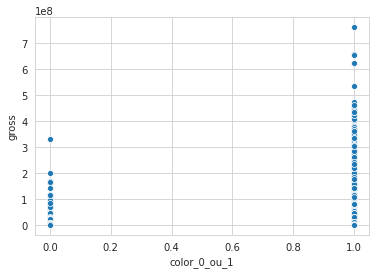

In [0]:
sns.scatterplot(data = color_or_bw, x = 'color_0_ou_1', y = 'gross')

In [0]:
color_or_bw.groupby('color').mean()['gross']

color
 Black and White    3.245702e+07
Color               4.902619e+07
Name: gross, dtype: float64

In [0]:
color_or_bw.groupby('color').mean()['imdb_score']

color
 Black and White    7.227273
Color               6.409533
Name: imdb_score, dtype: float64

In [0]:
imdb['imdb_score'].describe()

count    5043.000000
mean        6.442138
std         1.125116
min         1.600000
25%         5.800000
50%         6.600000
75%         7.200000
max         9.500000
Name: imdb_score, dtype: float64

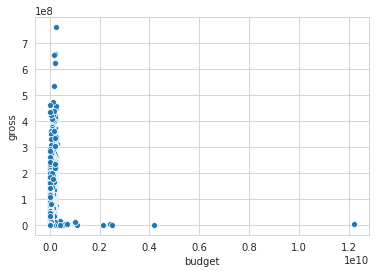

In [0]:
budget_gross = imdb[['budget', 'gross']].dropna().query('budget > 0 or gross > 0')

sns.scatterplot(x = 'budget', y = 'gross', data = budget_gross)

In [0]:
imdb.sort_values('budget', ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2988,Color,Joon-ho Bong,363.0,110.0,584.0,74.0,Kang-ho Song,629.0,2201412.0,Comedy|Drama|Horror|Sci-Fi,Doona Bae,The Host,68883,1173,Ah-sung Ko,0.0,daughter|han river|monster|river|seoul,http://www.imdb.com/title/tt0468492/?ref_=fn_t...,279.0,Korean,South Korea,R,1.221550e+10,2006.0,398.0,7.0,1.85,7000
3859,Color,Chan-wook Park,202.0,112.0,0.0,38.0,Yeong-ae Lee,717.0,211667.0,Crime|Drama,Min-sik Choi,Lady Vengeance,53508,907,Hye-jeong Kang,0.0,cake|christian|lesbian sex|oral sex|pregnant s...,http://www.imdb.com/title/tt0451094/?ref_=fn_t...,131.0,Korean,South Korea,R,4.200000e+09,2005.0,126.0,7.7,2.35,4000
3005,Color,Lajos Koltai,73.0,134.0,45.0,0.0,Péter Fancsikai,9.0,195888.0,Drama|Romance|War,Marcell Nagy,Fateless,5603,11,Bálint Péntek,0.0,bus|death|gay slur|hatred|jewish,http://www.imdb.com/title/tt0367082/?ref_=fn_t...,45.0,Hungarian,Hungary,R,2.500000e+09,2005.0,2.0,7.1,2.35,607
2323,Color,Hayao Miyazaki,174.0,134.0,6000.0,745.0,Jada Pinkett Smith,893.0,2298191.0,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,2710,Billy Crudup,0.0,anime|cult film|forest|princess|studio ghibli,http://www.imdb.com/title/tt0119698/?ref_=fn_t...,570.0,Japanese,Japan,PG-13,2.400000e+09,1997.0,851.0,8.4,1.85,11000
2334,Color,Katsuhiro Ôtomo,105.0,103.0,78.0,101.0,Robin Atkin Downes,488.0,410388.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,William Hootkins,Steamboy,13727,991,Rosalind Ayres,1.0,19th century|ball|boy|inventor|steam,http://www.imdb.com/title/tt0348121/?ref_=fn_t...,79.0,Japanese,Japan,PG-13,2.127520e+09,2004.0,336.0,6.9,1.85,973


In [0]:
#list(imdb["country"])

In [0]:
imdb_usa = imdb.query("country == 'USA'")
imdb_usa.sort_values('budget', ascending = False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
3461,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383071,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0


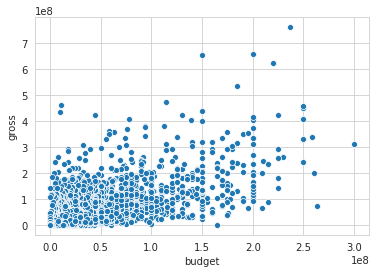

In [0]:
budget_gross = imdb_usa[['budget', 'gross']].dropna().query('budget > 0 or gross > 0')

sns.scatterplot(x = 'budget', y = 'gross', data = budget_gross)

Lucro vs prejuizo

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


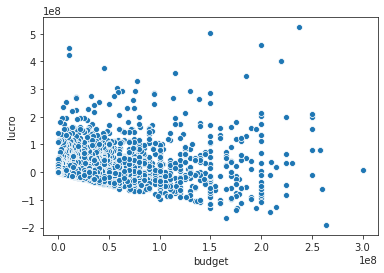

In [0]:
imdb_usa["lucro"] = imdb_usa["gross"] - imdb_usa["budget"]

budget_gross = imdb_usa.query('budget > 0 | gross > 0')[['budget', 'lucro']].dropna()

sns.scatterplot(x = 'budget', y = 'lucro', data = budget_gross)

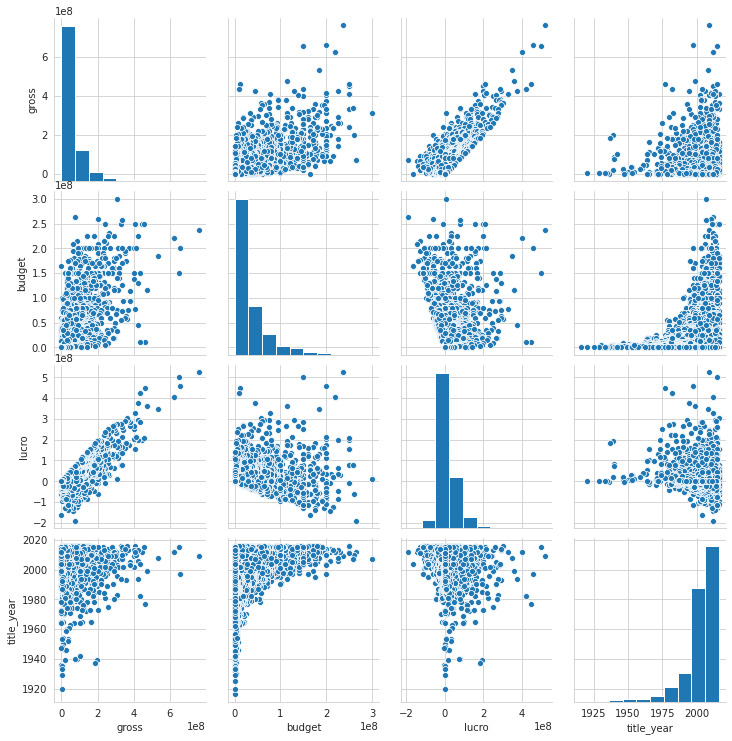

In [0]:
sns.pairplot(imdb_usa[["gross", "budget", "lucro", "title_year"]])

In [0]:
imdb_usa[["gross", "budget", "lucro", "title_year"]].corr()

,gross,budget,lucro,title_year
gross,1.000000,0.646158,0.799260,0.036865
budget,0.646158,1.000000,0.057774,0.232640
lucro,0.799260,0.057774,1.000000,-0.122092
title_year,0.036865,0.232640,-0.122092,1.000000


#Desafio 1: Boxplot de media do colorido e do preto e branco

Text(0.5, 1.0, 'Análise de Outliers')

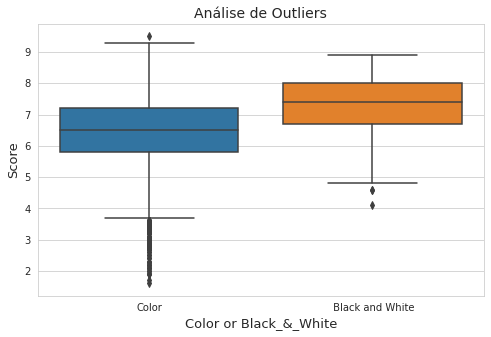

In [0]:
#1
color_media = color_or_bw.groupby('color')['imdb_score'].mean()
list_color_media = color_media.index
fig, ax = plt.subplots(figsize = (8,5))
sns.boxplot(data = color_or_bw.query(f'color in @list_color_media'), x = "color", y = "imdb_score")
ax.xaxis.set_label_text("Color or Black_&_White", fontsize = 13)
ax.yaxis.set_label_text("Score", fontsize = 13)
ax.set_title("Análise de Outliers", fontsize = 14)

#Desafio 2: No gráfico de budget por lucro temos um ponto com muito custo e prejuizo, descubra com é esse filme (budget próximo de 2.5)

In [0]:
#2 - O valor aparentemente é o segundo com maior budget (263700000.0) e com menor lucro (-190641321.0)
imdb_usa.query("lucro != 'NaN'")['lucro'].sort_values(ascending = False).tail()

49   -129828140.0
85   -136702695.0
28   -143826840.0
91   -164334574.0
5    -190641321.0
Name: lucro, dtype: float64

In [0]:
#2
imdb_usa['budget'].sort_values(ascending = False).head()

1       300000000.0
5       263700000.0
7       260000000.0
6       258000000.0
3461    258000000.0
Name: budget, dtype: float64

In [0]:
#2
filme_ruim = imdb_usa.query('lucro == -190641321.0 and budget == 263700000.0')
filme_ruim

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0


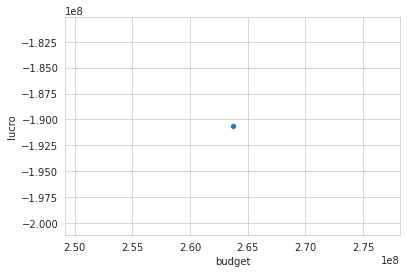

In [0]:
#2
budget_gross_2 = imdb_usa.query('lucro == -190641321.0')[['budget', 'lucro']].dropna()

sns.scatterplot(x = 'budget', y = 'lucro', data = budget_gross_2)

#Desafio 3: Em aula falamos que talvez, filmes mais recentes podem ter prejuizo pois ainda não tiveram tempo de recuperar o investimento. Analise essas informações e nos conte quais foram suas conclusões.

R: O gráfico abaixo não mostra necessariamente um menor lucro por serem mais novos. Não ha correlação entre o lucro e ano de lançamento. Caso houvesse e fosse notório, haveria uma correlação negativa no gráfico abaixo.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


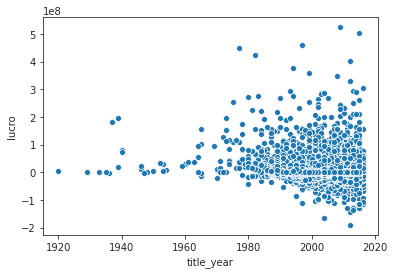

In [0]:
#3
imdb_usa["lucro"] = imdb_usa["gross"] - imdb_usa["budget"]
budget_gross_3 = imdb_usa.query("budget >0 | gross > 0")[["title_year", "lucro"]].dropna()
sns.scatterplot(x="title_year", y="lucro", data = budget_gross_3)

#Desafio 4: Quem são os filmes próximos de 1940 que ganharam tanto?

In [0]:
#4
pre_guerra = imdb_usa.query('title_year <= 1940 and lucro >= 100000000')
pre_guerra

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro
3970,Color,Victor Fleming,157.0,226.0,149.0,248.0,George Reeves,503.0,198655278.0,Drama|History|Romance|War,Hattie McDaniel,Gone with the Wind,215340,1862,Thomas Mitchell,1.0,battle of the sexes|gallantry|honesty|indiffer...,http://www.imdb.com/title/tt0031381/?ref_=fn_t...,706.0,English,USA,G,3977000.0,1939.0,384.0,8.2,1.37,16000,194678278.0
4449,Color,William Cottrell,145.0,83.0,0.0,31.0,Billy Gilbert,82.0,184925485.0,Animation|Family|Fantasy|Musical,Adriana Caselotti,Snow White and the Seven Dwarfs,133348,229,Lucille La Verne,1.0,dwarf|love|princess|queen|snow white,http://www.imdb.com/title/tt0029583/?ref_=fn_t...,204.0,English,USA,Approved,2000000.0,1937.0,47.0,7.7,1.37,0,182925485.0


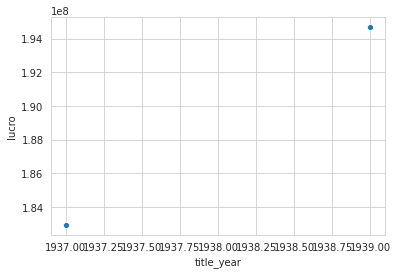

In [0]:
#4
lucro_year = imdb_usa.query('title_year < 1940 and lucro >= 100000000')[['title_year', 'lucro']].dropna()

sns.scatterplot(x = 'title_year', y = 'lucro', data = lucro_year)

#Desafio 5: No gráfico de filmes_par por grana temos alguns pontos estranhos entre 15 e 20. Confirme a tese genial do Paulo que o cidadão estranho é o Woody Allen. (Se ele tiver errado pode cornete nas redes sociais kkkkk)

In [0]:
#5
filmes_por_diretor = imdb_usa['director_name'].value_counts()
filmes_por_diretor

Steven Spielberg      24
Clint Eastwood        20
Martin Scorsese       20
Woody Allen           18
Tim Burton            16
                      ..
Becky Smith            1
John Francis Daley     1
Steve McQueen          1
Mark Andrews           1
Matt Jackson           1
Name: director_name, Length: 1812, dtype: int64

In [0]:
#5
gross_director = imdb_usa[["director_name", "gross"]].set_index("director_name").join(filmes_por_diretor, on = "director_name")
gross_director.columns = ["grana", "filmes_par"]
gross_director = gross_director.reset_index()
gross_director.sort_values('filmes_par', ascending = False).head()

,director_name,grana,filmes_par
45,Steven Spielberg,317011114.0,24.0
1560,Steven Spielberg,96067179.0,24.0
2328,Steven Spielberg,260000000.0,24.0
898,Steven Spielberg,197171806.0,24.0
516,Steven Spielberg,119654900.0,24.0


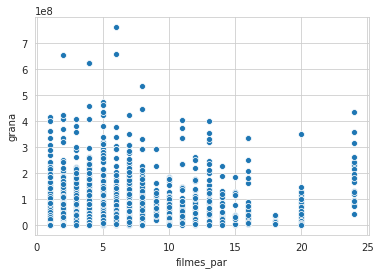

In [0]:
#5
sns.scatterplot(x = 'filmes_par', y = 'grana', data = gross_director)

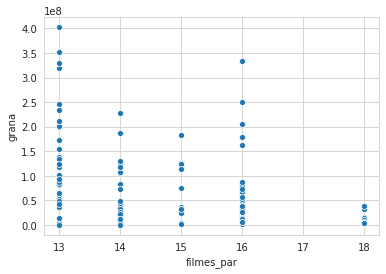

In [0]:
#5
filmes_estranhos = gross_director.query('filmes_par >= 13 and filmes_par < 19')
sns.scatterplot(x = 'filmes_par', y = 'grana', data = filmes_estranhos)
#Pelo grafico percebemos que os filmes estranhos estão na quantidade de filmes_par igual a 18

In [0]:
#5
filmes_estranhos = gross_director.query('filmes_par == 18')
filmes_estranhos
#Infelizmente ele estava certo kkkkkkkkkkkkk

,director_name,grana,filmes_par
1549,Woody Allen,7496522.0,18.0
1748,Woody Allen,16684352.0,18.0
1873,Woody Allen,13383737.0,18.0
1881,Woody Allen,10569071.0,18.0
1884,Woody Allen,9714482.0,18.0
1973,Woody Allen,33404871.0,18.0
1988,Woody Allen,17071230.0,18.0
2006,Woody Allen,3203044.0,18.0
2085,Woody Allen,14792779.0,18.0
2094,Woody Allen,4839383.0,18.0


#Desafio 6: Interpretar melhor o grafico de filmes_par por grana

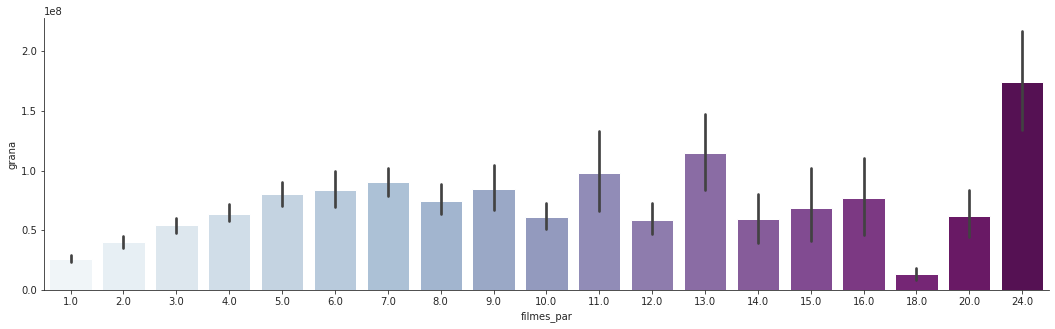

In [0]:
#6
filmes_plot = gross_director.query('filmes_par > 0')
fig, ax = plt.subplots(figsize = (18,5))
sns.despine()
sns.barplot(x = 'filmes_par', y = 'grana', data = filmes_plot, palette= 'BuPu')

#Desafio 7: Calcular a correlação para filmes depois de 2000(jogar fora os outros)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


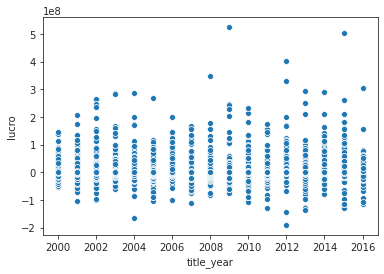

In [0]:
#7
imdb_usa["lucro"] = imdb_usa["gross"] - imdb_usa["budget"]
budget_gross_4 = imdb_usa.query("title_year >= 2000")[["title_year", "lucro"]].dropna()
sns.scatterplot(x="title_year", y="lucro", data = budget_gross_4)

#Desafio 8: Interpretar essa correlação

In [0]:
#8
#Não ha correlação

#Desafio 9: Utilizar notas nas correlações, nos graficos. Numero de avaliações por ano pode ser uma feature (imdb_score)